In [159]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize , word_tokenize
nltk.download('punkt')
from string import punctuation
from textblob import *

import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /Users/alisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [160]:
sp=pd.read_csv('speeches.csv')

In [161]:
sp.head()

,Unnamed: 0,Speaker,Title,Links,Delivered,Speeches
0,0,"Martin Luther King, Jr.",I Have A Dream,speeches/mlkihaveadream.htm,"delivered \r\n 28 August 1963, at the Lin...",I am happy to join with you today in what will...
1,1,John Fitzgerald Kennedy,Inaugural Address,speeches/jfkinaugural.htm,"delivered 20 January 1961, \r\nWashington, D.C.","Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,2,Franklin Delano Roosevelt,First Inaugural Address,speeches/fdrfirstinaugural.html,Delivered 4 March 1933,"President Hoover, Mr. Chief Justice, my friend..."
3,3,Franklin Delano Roosevelt,Pearl Harbor Address to the Nation,speeches/fdrpearlharbor.htm,"delivered 8 \r\nDecember 1941, Washington, D.C.","Mr. Vice President, Mr. Speaker, Members of th..."
4,4,Barbara Charline Jordan,1976 DNC Keynote Address,speeches/barbarajordan1976dnc.html,"delivered 12 July 1976, New York, NY",Thank you ladies and gentlemen for a very warm...


In [162]:
content=sp.Speeches
content.head()

0    I am happy to join with you today in what will...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    President Hoover, Mr. Chief Justice, my friend...
3    Mr. Vice President, Mr. Speaker, Members of th...
4    Thank you ladies and gentlemen for a very warm...
Name: Speeches, dtype: object

# revert it into dataframe

In [163]:
content = pd.DataFrame(content)
content

,Speeches
0,I am happy to join with you today in what will...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"President Hoover, Mr. Chief Justice, my friend..."
3,"Mr. Vice President, Mr. Speaker, Members of th..."
4,Thank you ladies and gentlemen for a very warm...
...,...
95,"Mr. Speaker, Mr. President, Members of the Hou..."
96,"Senator McCarthy:Mr. Chairman, in view of that..."
97,"Mr. President, fellow delegates: The long and ..."
98,"Mr. Chancellor, Mr. Vice Chancellor, Professor..."


# change them into lowercase

In [164]:
content["Speeches"]=content["Speeches"].str.lower()
print(content)

                                             Speeches
0   i am happy to join with you today in what will...
1   vice president johnson, mr. speaker, mr. chief...
2   president hoover, mr. chief justice, my friend...
3   mr. vice president, mr. speaker, members of th...
4   thank you ladies and gentlemen for a very warm...
..                                                ...
95  mr. speaker, mr. president, members of the hou...
96  senator mccarthy:mr. chairman, in view of that...
97  mr. president, fellow delegates: the long and ...
98  mr. chancellor, mr. vice chancellor, professor...
99  * thank you very much,senator fulbright,senato...

[100 rows x 1 columns]


# remove stopwords

In [165]:
stop_words = set(stopwords.words('english'))
content['without_stopwords'] = content['Speeches'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(content)

                                             Speeches  \
0   i am happy to join with you today in what will...   
1   vice president johnson, mr. speaker, mr. chief...   
2   president hoover, mr. chief justice, my friend...   
3   mr. vice president, mr. speaker, members of th...   
4   thank you ladies and gentlemen for a very warm...   
..                                                ...   
95  mr. speaker, mr. president, members of the hou...   
96  senator mccarthy:mr. chairman, in view of that...   
97  mr. president, fellow delegates: the long and ...   
98  mr. chancellor, mr. vice chancellor, professor...   
99  * thank you very much,senator fulbright,senato...   

                                    without_stopwords  
0   happy join today go history greatest demonstra...  
1   vice president johnson, mr. speaker, mr. chief...  
2   president hoover, mr. chief justice, friends:t...  
3   mr. vice president, mr. speaker, members senat...  
4   thank ladies gentlemen warm rec

# remove punctuation

In [166]:
import string
# Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
content['without_punctuations'] = content['without_stopwords'].apply(remove_punctuations)
print(content)

                                             Speeches  \
0   i am happy to join with you today in what will...   
1   vice president johnson, mr. speaker, mr. chief...   
2   president hoover, mr. chief justice, my friend...   
3   mr. vice president, mr. speaker, members of th...   
4   thank you ladies and gentlemen for a very warm...   
..                                                ...   
95  mr. speaker, mr. president, members of the hou...   
96  senator mccarthy:mr. chairman, in view of that...   
97  mr. president, fellow delegates: the long and ...   
98  mr. chancellor, mr. vice chancellor, professor...   
99  * thank you very much,senator fulbright,senato...   

                                    without_stopwords  \
0   happy join today go history greatest demonstra...   
1   vice president johnson, mr. speaker, mr. chief...   
2   president hoover, mr. chief justice, friends:t...   
3   mr. vice president, mr. speaker, members senat...   
4   thank ladies gentlemen war

# tokenization

In [167]:
content['tokenized'] = content.apply(lambda row: nltk.word_tokenize(row['without_punctuations']), axis=1)
print(content)

                                             Speeches  \
0   i am happy to join with you today in what will...   
1   vice president johnson, mr. speaker, mr. chief...   
2   president hoover, mr. chief justice, my friend...   
3   mr. vice president, mr. speaker, members of th...   
4   thank you ladies and gentlemen for a very warm...   
..                                                ...   
95  mr. speaker, mr. president, members of the hou...   
96  senator mccarthy:mr. chairman, in view of that...   
97  mr. president, fellow delegates: the long and ...   
98  mr. chancellor, mr. vice chancellor, professor...   
99  * thank you very much,senator fulbright,senato...   

                                    without_stopwords  \
0   happy join today go history greatest demonstra...   
1   vice president johnson, mr. speaker, mr. chief...   
2   president hoover, mr. chief justice, friends:t...   
3   mr. vice president, mr. speaker, members senat...   
4   thank ladies gentlemen war

# the above is the basic text mining. wee can also use the outcome on other techniques.

# wordcloud /need to be fixed

In [168]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
% matplotlib inline

In [181]:
text = str(content.tokenized[:])
text

'0     [happy, join, today, go, history, greatest, de...\n1     [vice, president, johnson, mr, speaker, mr, ch...\n2     [president, hoover, mr, chief, justice, friend...\n3     [mr, vice, president, mr, speaker, members, se...\n4     [thank, ladies, gentlemen, warm, reception, on...\n                            ...                        \n95    [mr, speaker, mr, president, members, house, m...\n96    [senator, mccarthymr, chairman, view, request,...\n97    [mr, president, fellow, delegates, long, metic...\n98    [mr, chancellor, mr, vice, chancellor, profess...\n99    [thank, muchsenator, fulbrightsenator, javitss...\nName: tokenized, Length: 100, dtype: object'

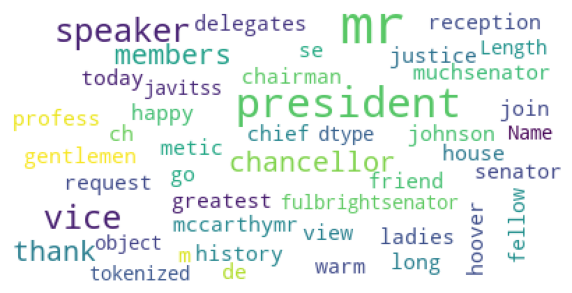

In [182]:
wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      max_font_size=40,
                      random_state=42).generate(text)
fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');